In [1]:
import pandas as pd
import numpy as np
import pyLDAvis

# Anti Vaccine

## Number of Topics

In [46]:
Number = [	2, 	3, 	4,	5,	6,	7,	8,	9,	10]
LB_LogLikelihood = [	-61197582.18,	-60732388.13,	-60761767.45,	-60637079.6,	-60608204.49,	-60552307.73,	-60524313.8,	-60560971.64,	-60559452.61]
UB_Perplexity =[	6.378049449,	6.32956664,	6.332628571,	6.319633527,	6.316624145,	6.310798551,	6.307881006,	6.311701509,	6.311543195]

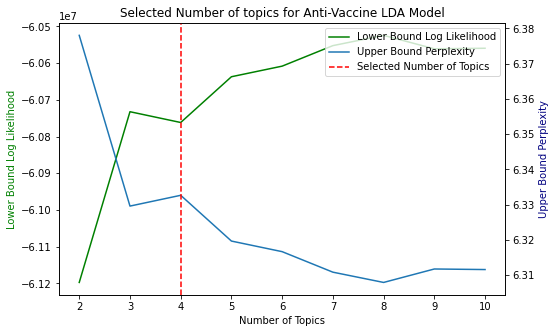

In [47]:
fig, ax = plt.subplots(figsize = (8, 5))
ax1 = ax.twinx()
l1, = ax.plot(Number, LB_LogLikelihood, label='Lower Bound Log Likelihood', color='green')
l2, = ax1.plot(Number, UB_Perplexity, label='Upper Bound Perplexity')
ax.set_xlabel('Number of Topics')
ax.set_ylabel('Lower Bound Log Likelihood')
ax.yaxis.label.set_color('green')
ax1.yaxis.label.set_color('navy')
ax1.set_ylabel('Upper Bound Perplexity')

l3 = ax1.axvline(x=4, color='red', linestyle='--', label='Selected Number of Topics')
plt.title('Selected Number of topics for Anti-Vaccine LDA Model')
plt.legend(handles=[l1, l2, l3],loc='best')

## PyLDAvis

In [2]:
import ast
with open('../../Files/models/topics/a_4_vocab_2.txt', 'r') as file:
    vocab = file.read().splitlines()

In [3]:
with open('../../Files/models/topics/a_4_tf_2.txt', 'r') as file:
    TF = file.read().splitlines()

In [4]:
df = pd.read_pickle('../../Files/models/topics/term_topics_a_4_2.pkl')
df2 = pd.read_pickle('../../Files/models/topics/doctop_a_4_distr_2.pickle')

In [5]:
docLen = pd.read_pickle('../../Files/models/topics/doclen_a_4_2.pkl')
doclen = docLen['doc_len']
df2['len'] = doclen

In [6]:
df2['sum'] = df2[['topic_0', 'topic_1', 'topic_2', 'topic_3']].sum(axis=1)
df5 = df2[df2['sum'] == 1]
df3 = df5[['topic_0', 'topic_1', 'topic_2',  'topic_3']]
doc_len = df5['len']

In [7]:
topic_term = df.to_numpy()
doc_topic = df3.to_numpy()

In [8]:
topic_term.shape

(4, 5000)

In [9]:
doc_topic.shape

(288539, 4)

In [10]:
len(vocab)

5000

In [11]:
Anti_top = pyLDAvis.prepare(topic_term, doc_topic,  doc_len,vocab, TF )

/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; se

In [23]:
pyLDAvis.display(Anti_top)

## Get Topic Descriptions

In [21]:
word_id = list(df.columns.values)
topic_1 = df.iloc[[0]]
topic_1 = df.iloc[[0]]
ord_vocab = [vocab[i] for i in word_id]
topic_1 = topic_1.transpose()
topic_1['word'] = ord_vocab
top_words = list(topic_1.sort_values(by=[0], ascending=False)[0:30]['word'])

## Subcluster Differences

In [13]:
a_sr = df2[['subreddit', 'topic_0', 'topic_1', 'topic_2', 'topic_3']].groupby('subreddit').mean()

In [14]:
with open('../../Files/Submissions/score/done/subcluster.txt', 'r') as f:
    subcluster = f.read().splitlines()

In [15]:
subcluster

['DebateVaccines',
 'CovidVaccineInjury',
 'VaccineDiscussion',
 'AncientTruehistory',
 'conspiracyNOPOL',
 'TopMindsOfReddit',
 'NoNewNormal',
 'TakeTheJab',
 'NoLockdownsNoMasks',
 'VACCINES',
 'conspiracyhub',
 'ConspiracyUltra',
 'altnewz',
 'NoNoNewNormal',
 'NoNewNormalBan',
 'noagenda',
 'antivax',
 'conspiracies',
 'CovidVaccinated',
 'CovidIsACult',
 'vacci_nation',
 'conspiracy',
 'TrueAntiVaccination']

In [16]:
a_sr_s = a_sr[a_sr.index.isin(subcluster)]

In [17]:
a_sr_s

,topic_0,topic_1,topic_2,topic_3
subreddit,,,,
ConspiracyUltra,0.774820,0.091855,0.063580,0.069744
CovidIsACult,0.713935,0.232115,0.026938,0.027012
CovidVaccinated,0.656095,0.208984,0.092952,0.041969
CovidVaccineInjury,0.790117,0.103618,0.046937,0.059328
DebateVaccines,0.774868,0.111471,0.068491,0.045170
NoLockdownsNoMasks,0.787549,0.110214,0.043402,0.058835
NoNewNormal,0.485343,0.337882,0.108899,0.067876
NoNewNormalBan,0.397849,0.416843,0.123715,0.061593
NoNoNewNormal,0.437409,0.348078,0.119538,0.094975


In [18]:
import matplotlib.pyplot as plt

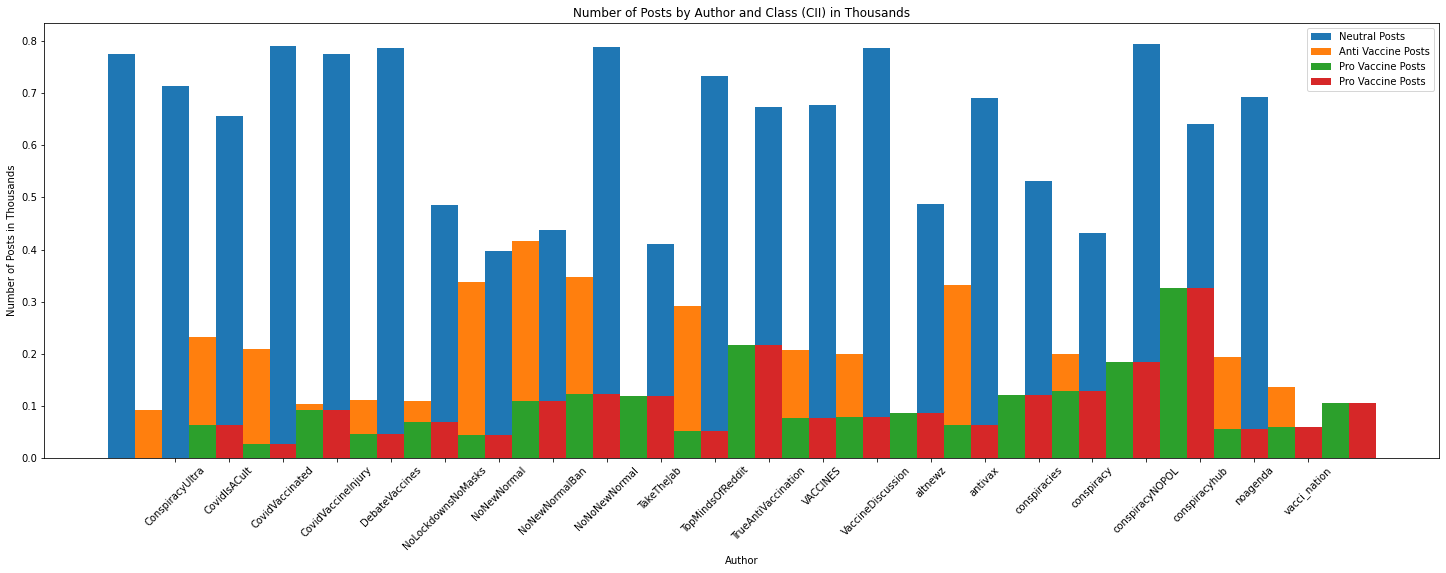

In [20]:
def addlabels(x,y,offset=0):
    for i in range(len(x)):
        plt.text((i+ offset), (y[i] + 250), "{:,}".format(int(y[i])), ha = 'center', rotation = 0)

subs = a_sr_s.index.values
y = a_sr_s['topic_0']
y1 = a_sr_s['topic_1']
y2 = a_sr_s['topic_2']
y3 = a_sr_s['topic_3']
x = np.arange(len(subs))
width = 0.5

fig, ax = plt.subplots(figsize = (25, 8))
rects1 = ax.bar(x - (2* width), y, width, label='Neutral Posts')
rects2 = ax.bar(x - width, y1, width, label='Anti Vaccine Posts')
rects3 = ax.bar(x + width, y2, width, label='Pro Vaccine Posts')
rects4 = ax.bar(x + (2* width), y2, width, label='Pro Vaccine Posts')
# addlabels(x, y, -0.3)
# addlabels(x, y1, 0.0)
# addlabels(x, y2, 0.3)
plt.title("Number of Posts by Author and Class (CII) in Thousands")
# plt.ylim(0.22, 0.26)
plt.ylabel("Number of Posts in Thousands")

plt.xlabel("Author")
plt.xticks(x, subs, rotation=45)
plt.legend()

# Pro Vax

### Number of Topics

In [32]:
Number= [	2,	3,	4,	5,	6,	7,	8]
LB_LogLikelihood= [	-9113045.799, 	-9128440.805, 	-9158161.695, 	-9167561.315, 	-9189898.327, 	-9206951.822, 	-9202556.697]
UB_Perplexity= [	5.443136324, 	5.452331616, 	5.470083624, 	5.475697928, 	5.489039615, 	5.499225506, 	5.49660034]

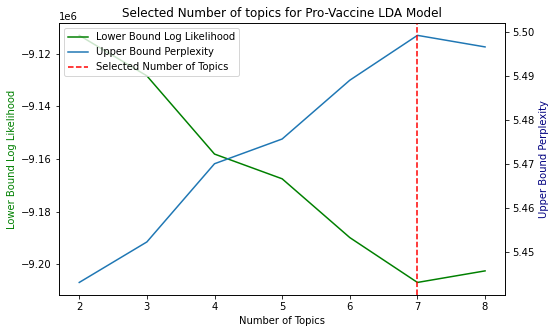

In [45]:
fig, ax = plt.subplots(figsize = (8, 5))
ax1 = ax.twinx()
l1, = ax.plot(Number, LB_LogLikelihood, label='Lower Bound Log Likelihood', color='green')
l2, = ax1.plot(Number, UB_Perplexity, label='Upper Bound Perplexity')
ax.set_xlabel('Number of Topics')
ax.set_ylabel('Lower Bound Log Likelihood')
ax.yaxis.label.set_color('green')
ax1.yaxis.label.set_color('navy')
ax1.set_ylabel('Upper Bound Perplexity')

l3 = ax1.axvline(x=7, color='red', linestyle='--', label='Selected Number of Topics')
plt.title('Selected Number of topics for Pro-Vaccine LDA Model')
plt.legend(handles=[l1, l2, l3],loc='best')

## PyLDAvis

In [122]:
import ast
with open('../../Files/models/topics/p_7_vocab_2.txt', 'r') as file:
    vocab = file.read().splitlines()

with open('../../Files/models/topics/p_7_tf_2.txt', 'r') as file:
    TF = file.read().splitlines()

df = pd.read_pickle('../../Files/models/topics/term_topics_p_7_2.pkl')
df2 = pd.read_pickle('../../Files/models/topics/doctop_p_7_distr_2.pickle')

docLen = pd.read_pickle('../../Files/models/topics/doclen_p_7_2.pkl')
doclen = docLen['doc_len']
df2['len'] = doclen

df2['sum'] = df2[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']].sum(axis=1)
df5 = df2[df2['sum'] == 1]
df3 = df5[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']]
doc_len = df5['len']

In [123]:
topic_term = df.to_numpy()
doc_topic = df3.to_numpy()

In [124]:
topic_term.shape

(7, 5000)

In [125]:
len(vocab)

5000

In [126]:
Pro_top = pyLDAvis.prepare(topic_term, doc_topic,  doc_len,vocab, TF )

/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; se

In [127]:
pyLDAvis.display(Pro_top)

## Get Topic Descriptions

## Subcluster Differences

In [128]:
p_sr = df2[['subreddit', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']].groupby('subreddit').mean()

In [129]:
p_sr_s = p_sr[p_sr.index.isin(subcluster)]

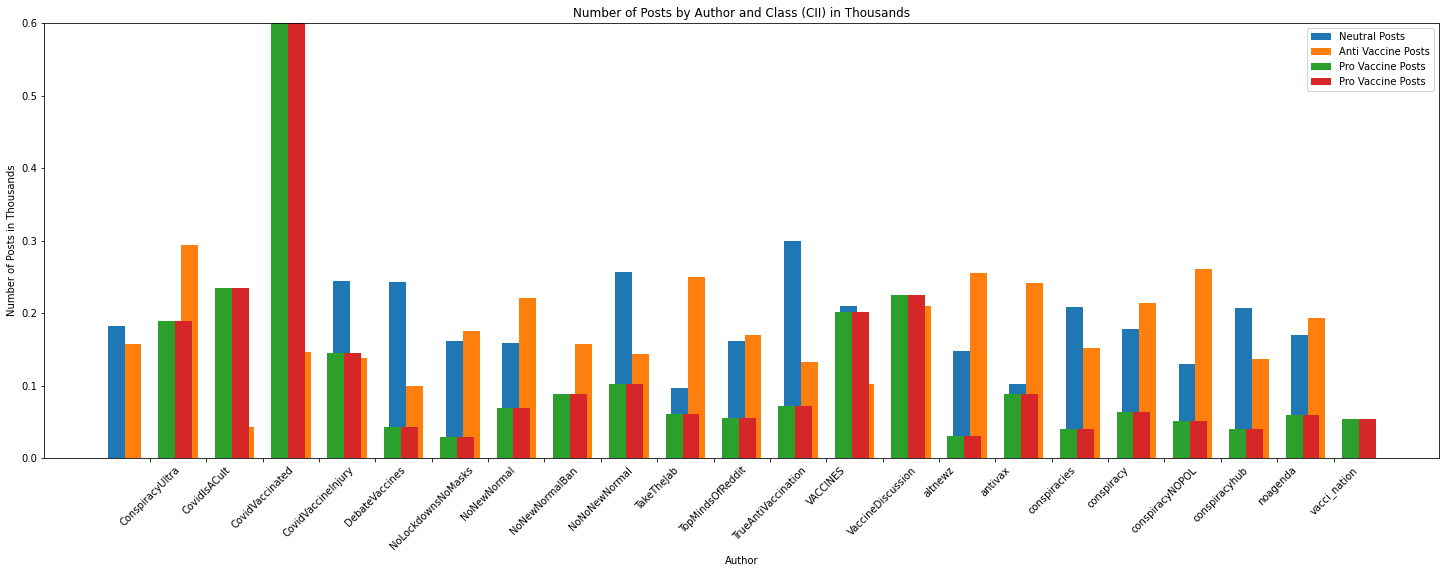

In [132]:
def addlabels(x,y,offset=0):
    for i in range(len(x)):
        plt.text((i+ offset), (y[i] + 250), "{:,}".format(int(y[i])), ha = 'center', rotation = 0)

subs = p_sr_s.index.values
y = p_sr_s['topic_0']
y1 = p_sr_s['topic_1']
y2 = p_sr_s['topic_2']
y3 = p_sr_s['topic_3']
x = np.arange(len(subs))
width = 0.3

fig, ax = plt.subplots(figsize = (25, 8))
rects1 = ax.bar(x - (2* width), y, width, label='Neutral Posts')
rects2 = ax.bar(x - width, y1, width, label='Anti Vaccine Posts')
rects3 = ax.bar(x + width, y2, width, label='Pro Vaccine Posts')
rects4 = ax.bar(x + (2* width), y2, width, label='Pro Vaccine Posts')
# addlabels(x, y, -0.3)
# addlabels(x, y1, 0.0)
# addlabels(x, y2, 0.3)
plt.title("Number of Posts by Author and Class (CII) in Thousands")
plt.ylim(0, 0.6)
plt.ylabel("Number of Posts in Thousands")

plt.xlabel("Author")
plt.xticks(x, subs, rotation=45)
plt.legend()

# Neutral

## Number of Topics

In [48]:
Number = 	[2,	3,	4,	5,	6,	7,	8]
LB_LogLikelihood = [	-7809203.831,	-7842201.601,	-7883585.952,	-7916024.304,	-7925429.533,	-7937016.646,	-7932070.884]
UB_Perplexity = [	5.866667942,	5.891457532,	5.922547545,	5.946916871,	5.953982553,	5.962687378,	5.958971872]

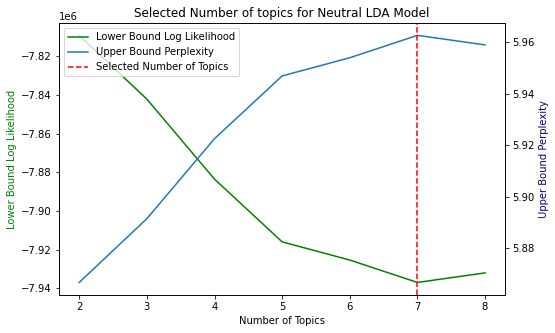

In [49]:
fig, ax = plt.subplots(figsize = (8, 5))
ax1 = ax.twinx()
l1, = ax.plot(Number, LB_LogLikelihood, label='Lower Bound Log Likelihood', color='green')
l2, = ax1.plot(Number, UB_Perplexity, label='Upper Bound Perplexity')
ax.set_xlabel('Number of Topics')
ax.set_ylabel('Lower Bound Log Likelihood')
ax.yaxis.label.set_color('green')
ax1.yaxis.label.set_color('navy')
ax1.set_ylabel('Upper Bound Perplexity')

l3 = ax1.axvline(x=7, color='red', linestyle='--', label='Selected Number of Topics')
plt.title('Selected Number of topics for Neutral LDA Model')
plt.legend(handles=[l1, l2, l3],loc='best')

## PyLDAvis

In [24]:
import ast
with open('../../Files/models/topics/n_7_vocab_2.txt', 'r') as file:
    vocab = file.read().splitlines()

with open('../../Files/models/topics/n_7_tf_2.txt', 'r') as file:
    TF = file.read().splitlines()

df = pd.read_pickle('../../Files/models/topics/term_topics_n_7_2.pkl')
df2 = pd.read_pickle('../../Files/models/topics/doctop_n_7_distr_2.pickle')

docLen = pd.read_pickle('../../Files/models/topics/doclen_n_7_2.pkl')
doclen = docLen['doc_len']
df2['len'] = doclen

df2['sum'] = df2[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']].sum(axis=1)
df5 = df2[df2['sum'] == 1]
df3 = df5[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']]
doc_len = df5['len']

In [25]:
topic_term = df.to_numpy()
doc_topic = df3.to_numpy()

In [28]:
print(topic_term.shape, doc_topic.shape)

(7, 5000) (281273, 7)


In [29]:
len(vocab)

5000

In [30]:
Neut_top = pyLDAvis.prepare(topic_term, doc_topic,  doc_len,vocab, TF )

/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; se

In [31]:
pyLDAvis.display(Neut_top)